<a href="https://colab.research.google.com/github/Victor-Ribeiro-Acosta/Projeto-Recomendacao-de-Produtos-Baseado-em-Imagens/blob/main/Sistema_de_Recomenda%C3%A7%C3%A3o_Baseado_em_Imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Montando drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
data_path = '/content/drive/MyDrive/Projetos_DIO/Sistema_recomendacao/Base_dados_sistema_recomendacao/'

# Listar arquivos para garantir que o caminho está correto
os.listdir(data_path)

['Categorias.txt', 'Oculos', 'Boinas', 'Relogio']

Buscar dados

In [ ]:
categorias = []

with open(data_path + 'Categorias.txt', 'r') as txt:
  categorias = txt.read().splitlines()

print(categorias)

['Boinas', 'Oculos', 'Relogio']


In [ ]:
# Lista para armazenar as imagens e labels
image_paths = []
labels = []

# Carregar imagens
for category in categorias:
    category_path = os.path.join(data_path, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        image_paths.append(img_path)
        labels.append(category)

for caminho in image_paths:
  print(caminho)

/content/drive/MyDrive/Projetos_DIO/Sistema_recomendacao/Base_dados_sistema_recomendacao/Boinas/17.jpg
/content/drive/MyDrive/Projetos_DIO/Sistema_recomendacao/Base_dados_sistema_recomendacao/Boinas/20.jpg
/content/drive/MyDrive/Projetos_DIO/Sistema_recomendacao/Base_dados_sistema_recomendacao/Boinas/18.jpg
/content/drive/MyDrive/Projetos_DIO/Sistema_recomendacao/Base_dados_sistema_recomendacao/Boinas/21.jpg
/content/drive/MyDrive/Projetos_DIO/Sistema_recomendacao/Base_dados_sistema_recomendacao/Boinas/22.jpg
/content/drive/MyDrive/Projetos_DIO/Sistema_recomendacao/Base_dados_sistema_recomendacao/Boinas/19.jpg
/content/drive/MyDrive/Projetos_DIO/Sistema_recomendacao/Base_dados_sistema_recomendacao/Boinas/24.jpg
/content/drive/MyDrive/Projetos_DIO/Sistema_recomendacao/Base_dados_sistema_recomendacao/Boinas/23.jpg
/content/drive/MyDrive/Projetos_DIO/Sistema_recomendacao/Base_dados_sistema_recomendacao/Oculos/10.jpg
/content/drive/MyDrive/Projetos_DIO/Sistema_recomendacao/Base_dados_siste

Importando as bibliotecas

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os

Extrair as características usando redes neuroais convolucionais

In [ ]:
model = VGG16(weights='imagenet', include_top=False, pooling='avg')
def extract_features(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model.predict(img_data)
    return features

features_list = [extract_features(img_path, model) for img_path in image_paths]
features_matrix = np.vstack(features_list)

1/1 [==============================] - 0s 18ms/step


Calcular a similaridade entre objetos

In [ ]:
similarity_matrix = cosine_similarity(features_matrix)

Função de recomendação baseada na similaridade entre objetos

In [ ]:
def recommend_images(image_index, similarity_matrix, top_n=6):
    similarity_scores = list(enumerate(similarity_matrix[image_index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    recommended_indices = [score[0] for score in similarity_scores[1:top_n+1]]
    return recommended_indices

Testando a recomendação

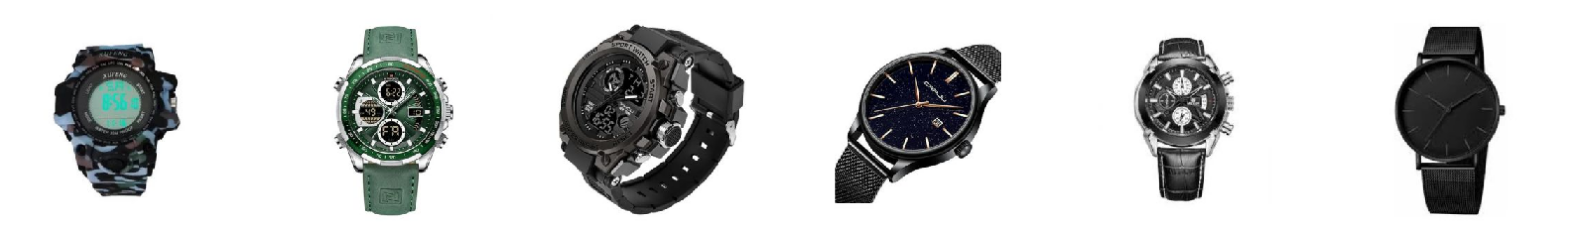

In [ ]:
image_index = 17  # índice da imagem para a qual queremos recomendações
recommended_indices = recommend_images(image_index, similarity_matrix)

# Exibir imagens recomendadas
plt.figure(figsize=(20, 4))
for i, idx in enumerate(recommended_indices):
    img = image.load_img(image_paths[idx], target_size=(224, 224))
    plt.subplot(1, 6, i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()